In [48]:
# 数据来源: <Alfred数据室> --- 北上广深租房图鉴

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rc('figure',figsize=(10,10))
plt.rcParams['figure.dpi'] = mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv("E:\\study\\demo\\Data_Demo\\Python\\resource\\datasets\\data_sample.csv")
data[:5]

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5c714363397be4c5251a3ded,2,3,上地,北京,海淀,NaN,南 北,2,精装 集中供暖 双卫生间,整租 · 上地西里二层三居 自住出租 随时入住采光好 无遮挡,40.039000,3室2厅2卫,116.317831,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,137,15000,元/月,上地西里,整租
1,5c7148e6397be4c5251a583d,1,2,北大地,北京,丰台,NaN,南 北,1,集中供暖,整租 · 丰台北大地电报局街家具家电齐全南北向两居,39.856662,2室1厅1卫,116.292291,https://m.lianjia.com/chuzu/bj/zufang/BJ210122...,57,4500,元/月,电报局街,整租
2,5c71321e397be4c5251a0b46,1,1,燕莎,北京,朝阳,788.0,北,1,近地铁 精装 集中供暖,整租 · 远洋新干线 1室1厅 10500元,39.963231,1室1厅1卫,116.466150,https://m.lianjia.com/chuzu/bj/zufang/BJ216317...,56,10500,元/月,远洋新干线,整租
3,5c712721397be4c52519fc09,1,1,阜成门,北京,西城,886.0,东,1,近地铁 集中供暖 随时看房,南露园 1室1厅 5600元,39.930655,1室1厅1卫,116.348521,https://m.lianjia.com/chuzu/bj/zufang/BJ217362...,43,5600,元/月,南露园,整租
4,5c7123bd397be4c52519f7af,1,2,和平里,北京,朝阳,779.0,东 南,1,近地铁 集中供暖,和平里东街15号院 2室1厅 6300元,39.957079,2室1厅1卫,116.431393,https://m.lianjia.com/chuzu/bj/zufang/BJ215869...,56,6300,元/月,和平里东街15号院,整租


In [49]:
def get_aver(data):
    if isinstance(data,str) and '-' in data:
        low,high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)

data['rent_area'] = data['rent_area'].apply(get_aver)
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

for col in ['bathroom_num','bedroom_num','hall_num','rent_price_listing']:
    data[col] = data[col].astype(int)

def get_city_zf_loc(city,city_short,col=['longitude','latitude','dist'],data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city,col].dropna(subset=['latitude','longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'],sep=',')
    data_latlon.to_csv(file_name,index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

get_city_zf_loc('北京','bj',['longitude','latitude','dist'])
get_city_zf_loc('上海','sh',['longitude','latitude','dist'])
get_city_zf_loc('广州','gz',['longitude','latitude','dist'])
get_city_zf_loc('深圳','sz',['longitude','latitude','dist'])

北京的数据一共有2996条
上海的数据一共有2992条
广州的数据一共有2987条
深圳的数据一共有2994条


d:\envir\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


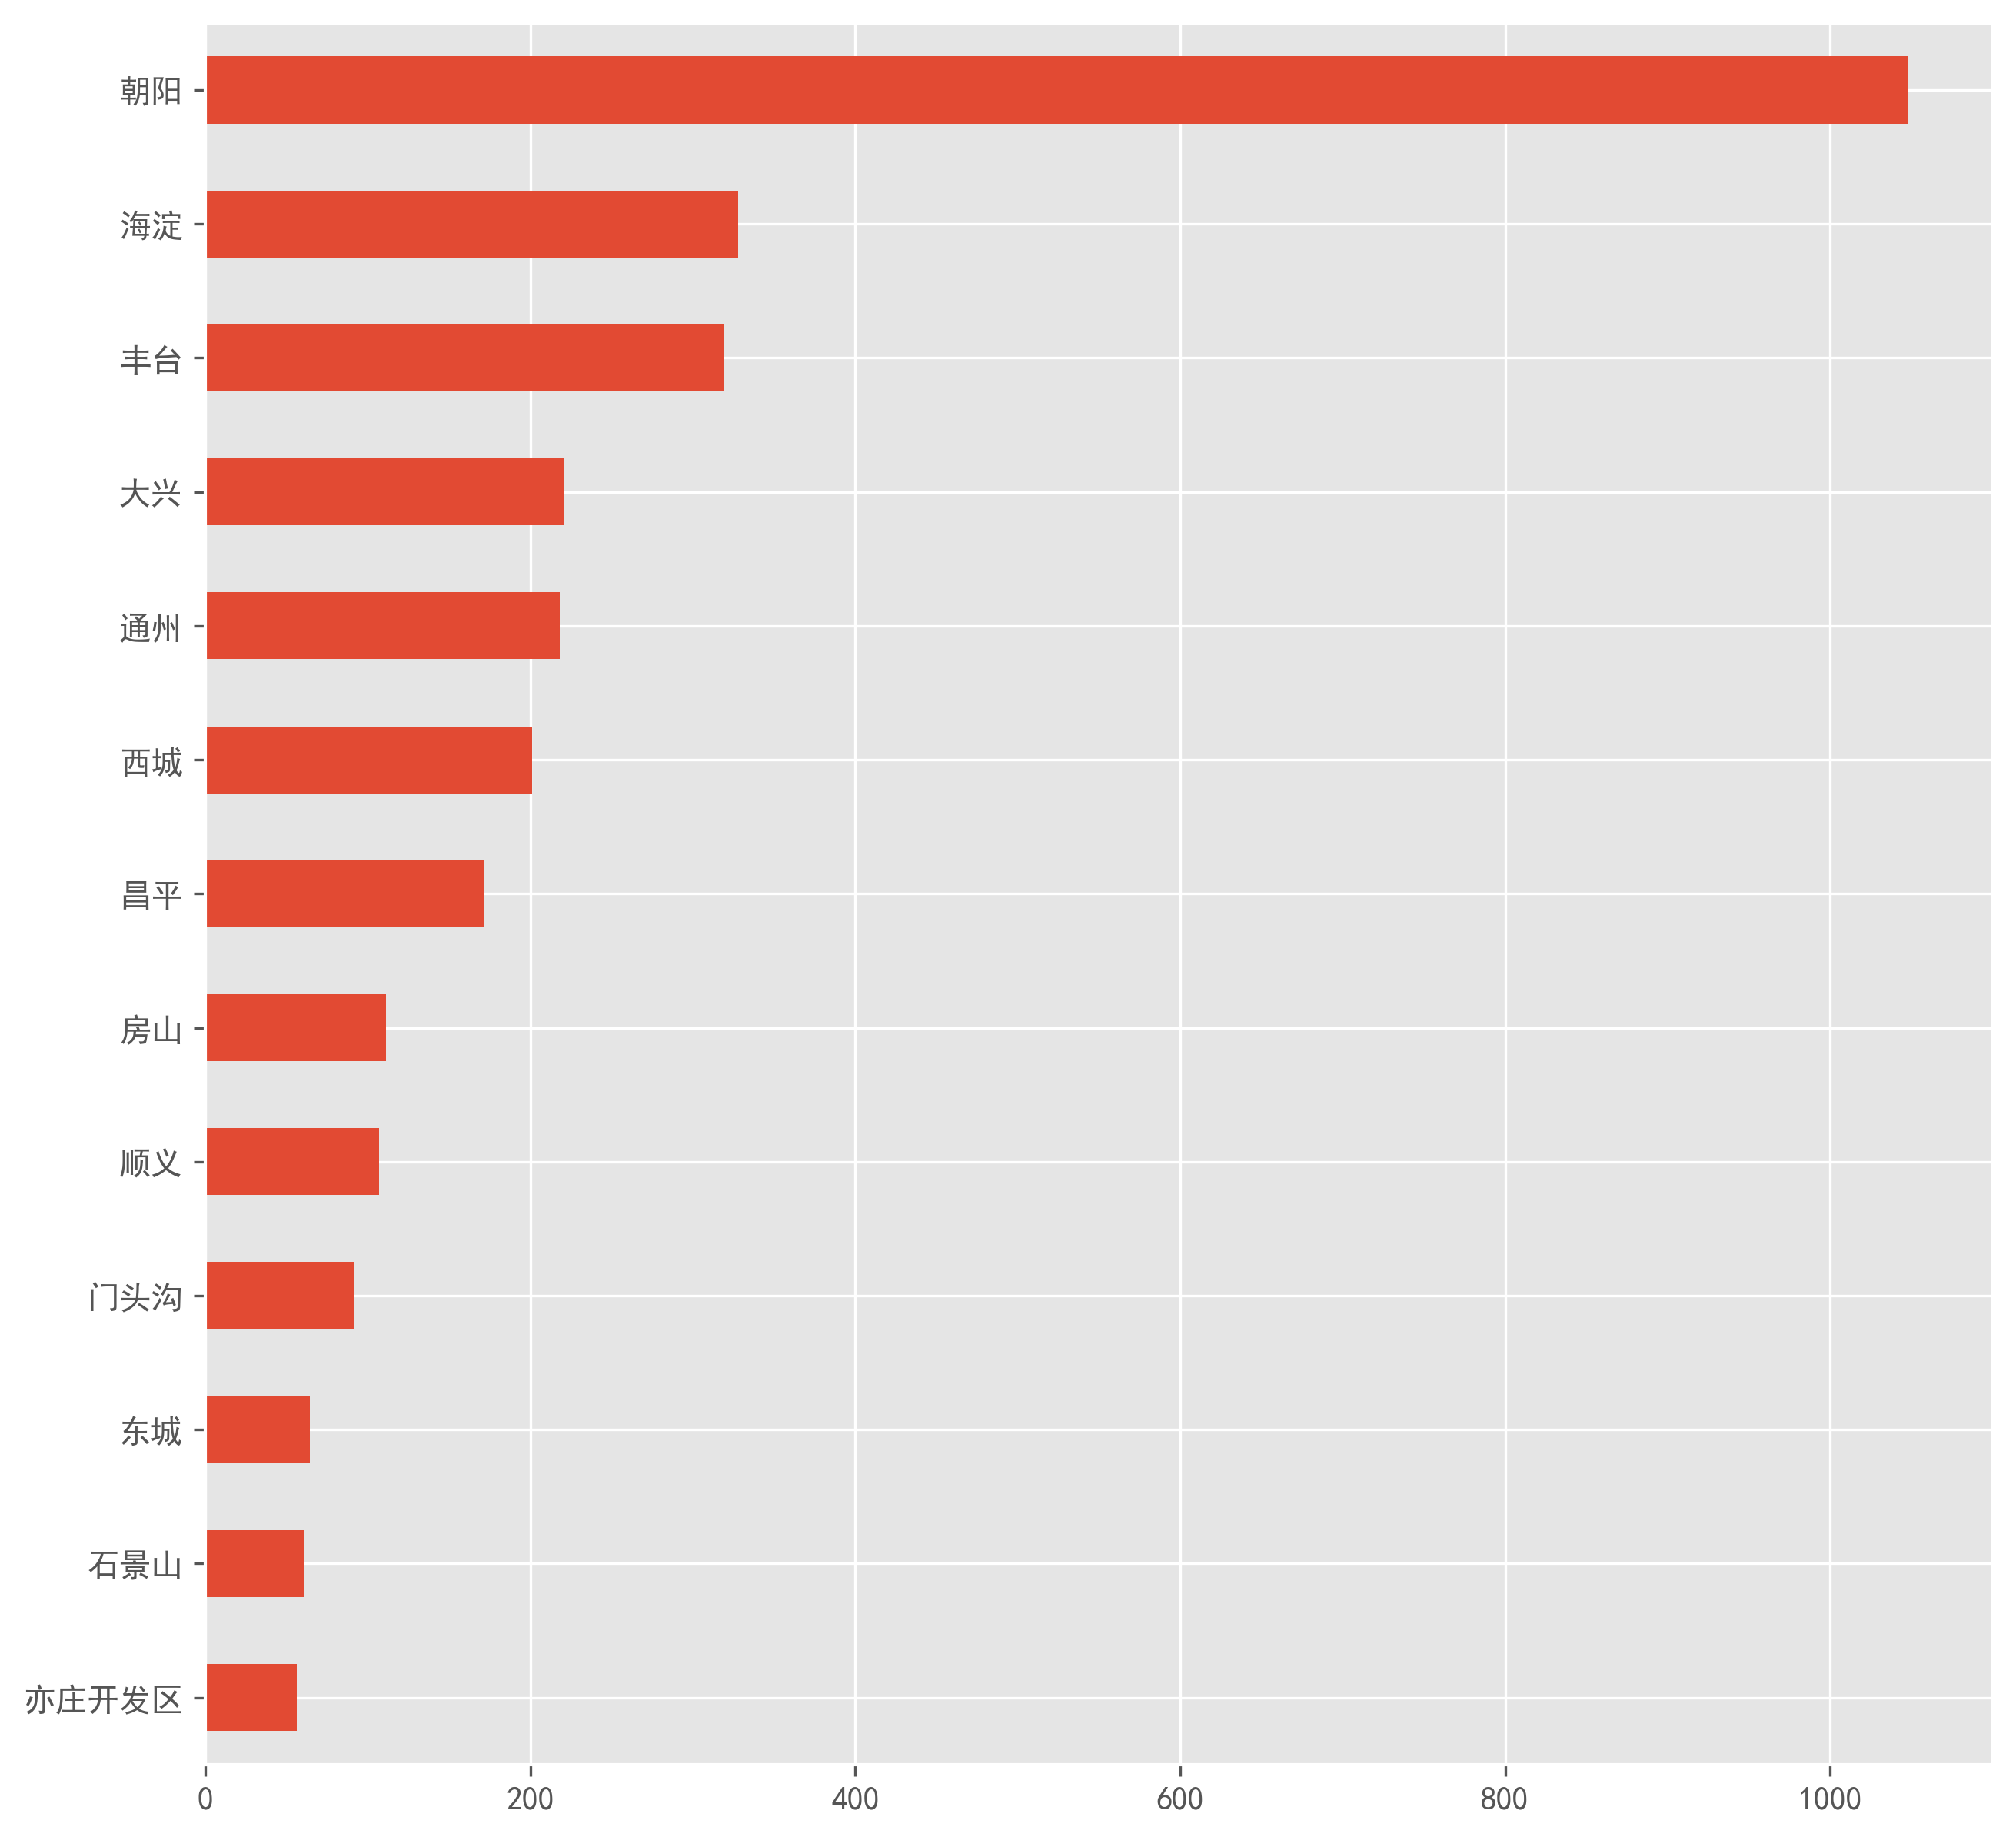

In [50]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude','longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()